# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 64.3 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 59.6 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 7.5 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 75.7 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 50.5 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 54.0 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 53.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 51.9 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 79.4 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 11.3 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 77.8 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.6 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=87f83213b326dbe3cfb9ca719664dbcf19442ecdd4b4b8b7ad38e3d07bfbf569
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets
from torch.utils.data import DataLoader,random_split
from tqdm import tqdm

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:

# Define transforms
transforms =transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

# Create training set and define training dataloader
train_data = datasets.MNIST(root="data", train=True, download=True, transform=transforms)
train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

# Create test set and define test dataloader
minst_data = datasets.MNIST(root="data", train=False, download=True, transform=transforms)
val_size=int(0.6*len(minst_data))
test_size=len(minst_data)-val_size
val_data,test_data=random_split(minst_data,[val_size,test_size])
val_loader= DataLoader(val_data, batch_size=100)
test_loader = DataLoader(test_data, batch_size=100)

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

the transform i chose was to convert image data set to tensor and use of normalizing preprocessing is to grayscale of image between 0 and 1.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [6]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [7]:
# Explore data
print("Number of MNIST train data examples: {}".format(len(train_data)))
print("Number of MNIST test data examples: {}".format(len(test_data)))

Number of MNIST train data examples: 60000
Number of MNIST test data examples: 4000


In [8]:
dataiter = iter(train_loader)
images, labels = next(dataiter)

print("number of images: {}".format(images.shape))
print("number of labels: {}".format(labels.shape))

number of images: torch.Size([100, 1, 28, 28])
number of labels: torch.Size([100])


2


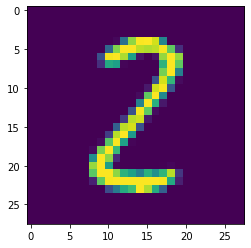

7


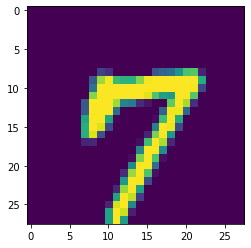

9


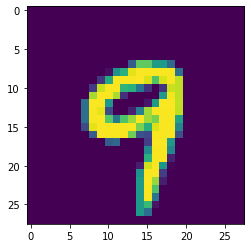

0


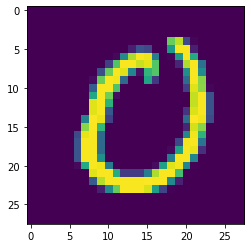

0


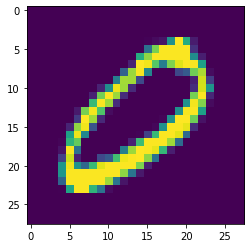

In [9]:
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28*28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Net().to(device)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
optimizer=optim.Adam(net.parameters(),lr=0.001)
criterion=nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
num_epochs=10

train_loss_history=list()
val_loss_history=list()

for epoch in range(num_epochs):
    net.train()
    train_loss=0.0
    train_correct=0.0
    
    for i,data in enumerate(train_loader):
        inputs,label=data
        inputs,label=inputs.to(device),label.to(device)
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,label)
        
        loss.backward()
        optimizer.step()
        
        _,preds=torch.max(outputs.data,1)
        train_correct+=(preds==label).sum().item()
        train_loss +=loss.item()
        
    print (train_correct,len(train_loader))    
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    
    val_loss=0.0
    val_correct=0.0
    net.eval()
    
    for inputs,label in val_loader:
        inputs,label=inputs.to(device),label.to(device)
        outputs=net(inputs)
        loss=criterion(outputs,label)
        
        _,preds=torch.max(outputs.data,1)
        val_correct+=(preds==label).sum().item()
        val_loss +=loss.item()
    print (val_correct,len(val_loader))
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

    

52498.0 600
Epoch 1 training accuracy: 87.50% training loss: 0.42363
5600.0 60
Epoch 1 validation accuracy: 93.33% validation loss: 0.23193
56159.0 600
Epoch 2 training accuracy: 93.60% training loss: 0.21407
5686.0 60
Epoch 2 validation accuracy: 94.77% validation loss: 0.16511
57282.0 600
Epoch 3 training accuracy: 95.47% training loss: 0.14718
5730.0 60
Epoch 3 validation accuracy: 95.50% validation loss: 0.13755
57756.0 600
Epoch 4 training accuracy: 96.26% training loss: 0.11982
5801.0 60
Epoch 4 validation accuracy: 96.68% validation loss: 0.10185
58187.0 600
Epoch 5 training accuracy: 96.98% training loss: 0.09803
5805.0 60
Epoch 5 validation accuracy: 96.75% validation loss: 0.10096
58372.0 600
Epoch 6 training accuracy: 97.29% training loss: 0.08746
5810.0 60
Epoch 6 validation accuracy: 96.83% validation loss: 0.10146
58558.0 600
Epoch 7 training accuracy: 97.60% training loss: 0.07605
5829.0 60
Epoch 7 validation accuracy: 97.15% validation loss: 0.09455
58623.0 600
Epoch 8 

Plot the training loss (and validation loss/accuracy, if recorded).

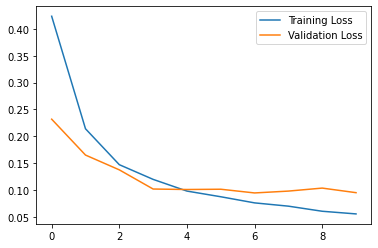

In [13]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [14]:
for epoch in range(num_epochs):
    net.eval()
    test_loss=0
    test_correct=0
    
    for i,data in enumerate(test_loader):
        inputs,label=data
        inputs,label=inputs.to(device),label.to(device)
        optimizer.zero_grad()
        outputs=net(inputs)
        loss=criterion(outputs,label)
        
        loss.backward()
        optimizer.step()
        
        _,preds=torch.max(outputs.data,1)
        test_correct+=(preds==label).sum().item()
        test_loss +=loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')
    
    

Epoch 1 test accuracy: 96.92% test loss: 0.09732
Epoch 2 test accuracy: 98.08% test loss: 0.05853
Epoch 3 test accuracy: 98.95% test loss: 0.03419
Epoch 4 test accuracy: 99.50% test loss: 0.02072
Epoch 5 test accuracy: 99.75% test loss: 0.01251
Epoch 6 test accuracy: 99.95% test loss: 0.00909
Epoch 7 test accuracy: 99.95% test loss: 0.00771
Epoch 8 test accuracy: 99.97% test loss: 0.00600
Epoch 9 test accuracy: 100.00% test loss: 0.00507
Epoch 10 test accuracy: 100.00% test loss: 0.00504


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [15]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        
        self.dropout=nn.Dropout(0.4)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.layer3(x)
        return x
    
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net2 = Net2().to(device)

In [16]:
optimizer=optim.SGD(net2.parameters(),lr=0.003,momentum=0.9)
criterion=nn.CrossEntropyLoss()

In [ ]:
num_epochs=10

train_loss_history=list()
val_loss_history=list()

for epoch in range(num_epochs):
    net2.train()
    train_loss=0.0
    train_correct=0.0
    
    for i,data in enumerate(train_loader):
        inputs,label=data
        inputs,label=inputs.to(device),label.to(device)
        optimizer.zero_grad()
        outputs=net2(inputs)
        loss=criterion(outputs,label)
        
        loss.backward()
        optimizer.step()
        
        _,preds=torch.max(outputs.data,1)
        train_correct+=(preds==label).sum().item()
        train_loss +=loss.item()
        
    print (train_correct,len(train_loader))    
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    
    val_loss=0.0
    val_correct=0.0
    net.eval()
    
    for inputs,label in val_loader:
        inputs,label=inputs.to(device),label.to(device)
        outputs=net2(inputs)
        loss=criterion(outputs,label)
        
        _,preds=torch.max(outputs.data,1)
        val_correct+=(preds==label).sum().item()
        val_loss +=loss.item()
    print (val_correct,len(val_loader))
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(val_loader):.2f}% validation loss: {val_loss/len(val_loader):.5f}')
    val_loss_history.append(val_loss/len(val_loader))

47183.0 600
Epoch 1 training accuracy: 78.64% training loss: 0.76933
5398.0 60
Epoch 1 validation accuracy: 89.97% validation loss: 0.34098
54447.0 600
Epoch 2 training accuracy: 90.75% training loss: 0.31690
5522.0 60
Epoch 2 validation accuracy: 92.03% validation loss: 0.26770
55432.0 600
Epoch 3 training accuracy: 92.39% training loss: 0.26078
5554.0 60
Epoch 3 validation accuracy: 92.57% validation loss: 0.24345
56164.0 600
Epoch 4 training accuracy: 93.61% training loss: 0.22112
5625.0 60
Epoch 4 validation accuracy: 93.75% validation loss: 0.21277
56625.0 600
Epoch 5 training accuracy: 94.38% training loss: 0.19279
5666.0 60
Epoch 5 validation accuracy: 94.43% validation loss: 0.18503
56992.0 600
Epoch 6 training accuracy: 94.99% training loss: 0.17112
5729.0 60
Epoch 6 validation accuracy: 95.48% validation loss: 0.15755
57345.0 600
Epoch 7 training accuracy: 95.58% training loss: 0.15154
5736.0 60
Epoch 7 validation accuracy: 95.60% validation loss: 0.14773


In [ ]:
for epoch in range(num_epochs):
    net2.eval()
    test_loss=0
    test_correct=0
    
    for i,data in enumerate(test_loader):
        inputs,label=data
        inputs,label=inputs.to(device),label.to(device)
        optimizer.zero_grad()
        outputs=net2(inputs)
        loss=criterion(outputs,label)
        
        loss.backward()
        optimizer.step()
        
        _,preds=torch.max(outputs.data,1)
        test_correct+=(preds==label).sum().item()
        test_loss +=loss.item()
    print(f'Epoch {epoch + 1} test accuracy: {test_correct/len(test_loader):.2f}% test loss: {test_loss/len(test_loader):.5f}')
    

In [ ]:
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
torch.save(Net, "Model1.pth")
torch.save(Net2, "Model2.pth")